In [1]:
import pandas as pd
import numpy as np

data="laptop_battery_health_usage.csv"
df=pd.read_csv(data)
df

,device_id,brand,model_year,os,usage_type,daily_usage_hours,charging_cycles,avg_charge_limit_percent,battery_health_percent,battery_age_months,overheating_issues,performance_rating
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,No,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,Yes,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,No,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,Yes,2
5,LB006,Acer,2020,Windows,Office,6,540,95,80,50,No,4
6,LB007,Apple,2023,macOS,Programming,8,210,80,95,18,No,5
7,LB008,HP,2018,Windows,Student,4,880,100,60,72,Yes,2
8,LB009,Dell,2022,Windows,Office,6,350,90,88,30,No,4
9,LB010,Lenovo,2021,Windows,Programming,7,480,85,83,36,No,4


In [2]:
print(df.shape)
print(df.columns)
print(df.info())
print(df.isnull().sum())


(50, 12)
Index(['device_id', 'brand', 'model_year', 'os', 'usage_type',
       'daily_usage_hours', 'charging_cycles', 'avg_charge_limit_percent',
       'battery_health_percent', 'battery_age_months', 'overheating_issues',
       'performance_rating'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   device_id                 50 non-null     object
 1   brand                     50 non-null     object
 2   model_year                50 non-null     int64 
 3   os                        50 non-null     object
 4   usage_type                50 non-null     object
 5   daily_usage_hours         50 non-null     int64 
 6   charging_cycles           50 non-null     int64 
 7   avg_charge_limit_percent  50 non-null     int64 
 8   battery_health_percent    50 non-null     int64 
 9   battery_age_months    

In [3]:
y=df['battery_health_percent']
X=df.drop(columns=['device_id','battery_health_percent'])
print(X.shape, y.shape)

(50, 10) (50,)


In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-Hot Encoding categorical columns
X_encoded = pd.get_dummies(X, columns=['brand', 'os', 'usage_type', 'overheating_issues'], drop_first=True)

print(X_encoded.head())


   model_year  daily_usage_hours  charging_cycles  avg_charge_limit_percent  \
0        2021                  6              420                        90   
1        2020                  8              610                       100   
2        2022                  7              310                        85   
3        2019                  5              700                       100   
4        2021                  9              820                       100   

   battery_age_months  performance_rating  brand_Apple  brand_Asus  \
0                  36                   4        False       False   
1                  48                   3        False       False   
2                  24                   5         True       False   
3                  60                   3        False       False   
4                  40                   2        False        True   

   brand_Dell  brand_HP  brand_Lenovo  os_macOS  usage_type_Gaming  \
0       False      True         Fa

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

print(X_scaled.shape)

(50, 17)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(40, 17) (10, 17)


In [7]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

model = Ridge(alpha=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R² Score: 0.9879874480465357
RMSE: 1.3287083715726817


In [8]:
# Residuals
residuals = y_test - y_pred

print("Residuals Summary:")
print(residuals.describe())


Residuals Summary:
count    10.000000
mean      0.419053
std       1.131912
min      -1.193049
25%      -0.410901
50%       0.378483
75%       1.124147
max       2.356283
Name: battery_health_percent, dtype: float64


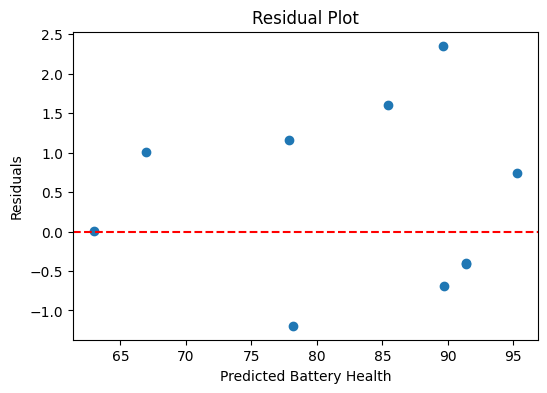

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Battery Health")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


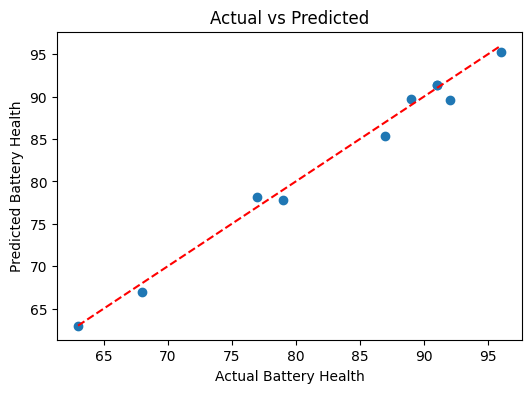

In [10]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Battery Health")
plt.ylabel("Predicted Battery Health")
plt.title("Actual vs Predicted")
plt.show()


In [11]:
error_df = pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predicted': y_pred,
    'Error': residuals.values.flatten()
})

# Sort by absolute error
error_df['Abs_Error'] = abs(error_df['Error'])
print(error_df.sort_values(by='Abs_Error', ascending=False).head())


   Actual  Predicted     Error  Abs_Error
5      92  89.643717  2.356283   2.356283
2      87  85.397688  1.602312   1.602312
7      77  78.193049 -1.193049   1.193049
4      79  77.839385  1.160615   1.160615
6      68  66.985257  1.014743   1.014743


In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100]
}

ridge = Ridge(max_iter=2000)

grid = GridSearchCV(
    ridge,
    param_grid,
    scoring='r2',
    cv=5
)

grid.fit(X_train, y_train)

print("Best Alpha:", grid.best_params_)
print("Best CV R² Score:", grid.best_score_)


Best Alpha: {'alpha': 10}
Best CV R² Score: 0.9221180739396975


In [13]:
best_model = grid.best_estimator_

y_pred_improved = best_model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Improved R² Score:", r2_score(y_test, y_pred_improved))
print("Improved RMSE:", mean_squared_error(y_test, y_pred_improved))


Improved R² Score: 0.9858158574618547
Improved RMSE: 1.5689080061442477


In [14]:
coeff_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient': best_model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df.head(10))


                     Feature  Coefficient
2            charging_cycles    -2.526374
5         performance_rating     2.097346
4         battery_age_months    -1.908894
16    overheating_issues_Yes    -1.655549
0                 model_year     1.637390
3   avg_charge_limit_percent    -1.268738
12         usage_type_Gaming    -0.955111
7                 brand_Asus    -0.582677
15        usage_type_Student    -0.306671
6                brand_Apple     0.271510


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression R²: 0.9797095998877938
Linear Regression RMSE: 2.2443211564111216


In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=grid.best_params_['alpha'], max_iter=2000)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression R²:", r2_score(y_test, y_pred_ridge))
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge Regression R²: 0.9858158574618547
Ridge Regression RMSE: 1.5689080061442477


In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression R²:", r2_score(y_test, y_pred_lasso))
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso Regression R²: 0.9831590527159015
Lasso Regression RMSE: 1.8627771790941268


In [18]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=5000)
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

print("ElasticNet R²:", r2_score(y_test, y_pred_elastic))
print("ElasticNet RMSE:", mean_squared_error(y_test, y_pred_elastic))


ElasticNet R²: 0.9856772518912308
ElasticNet RMSE: 1.5842391683109645


In [19]:
comparison_df = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'ElasticNet'],
    'R2_Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_elastic)
    ],
    'RMSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_elastic)
    ]
})

print(comparison_df)


        Model  R2_Score      RMSE
0      Linear  0.979710  2.244321
1       Ridge  0.985816  1.568908
2       Lasso  0.983159  1.862777
3  ElasticNet  0.985677  1.584239
